# Getting data from NOAA webpage

In [1]:
!wget -O land_global_temperature_anomaly-1880-2015.csv https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv

--2017-01-04 13:27:28--  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/all/1/1880-2015.csv
Resolviendo www.ncdc.noaa.gov (www.ncdc.noaa.gov)... 205.167.25.172, 205.167.25.171, 2610:20:8040:2::171, ...
Conectando con www.ncdc.noaa.gov (www.ncdc.noaa.gov)[205.167.25.172]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [text/plain]
Grabando a: “land_global_temperature_anomaly-1880-2015.csv”

    [  <=>                                  ] 23.796      67,7KB/s   en 0,3s   

2017-01-04 13:27:29 (67,7 KB/s) - “land_global_temperature_anomaly-1880-2015.csv” guardado [23796]



In [2]:
import numpy as np

In [3]:
!head land_global_temperature_anomaly-1880-2015.csv

Global Land Temperature Anomalies
Units: Degrees Celsius
Base Period: 1901-2000
Year,Value
188001,-0.1538
188002,-0.5771
188003,-0.7250
188004,-0.2990
188005,-0.2098
188006,-0.3002


In [7]:
Temp_data = np.loadtxt(fname='land_global_temperature_anomaly-1880-2015.csv', delimiter=',', skiprows=4)
Temp_data

array([[  1.88001000e+05,  -1.53800000e-01],
       [  1.88002000e+05,  -5.77100000e-01],
       [  1.88003000e+05,  -7.25000000e-01],
       ..., 
       [  2.01510000e+05,   1.32120000e+00],
       [  2.01511000e+05,   1.28280000e+00],
       [  2.01512000e+05,   1.87220000e+00]])

In [8]:
np.shape(Temp_data)

(1632, 2)

In [10]:
from matplotlib import pyplot
%matplotlib inline

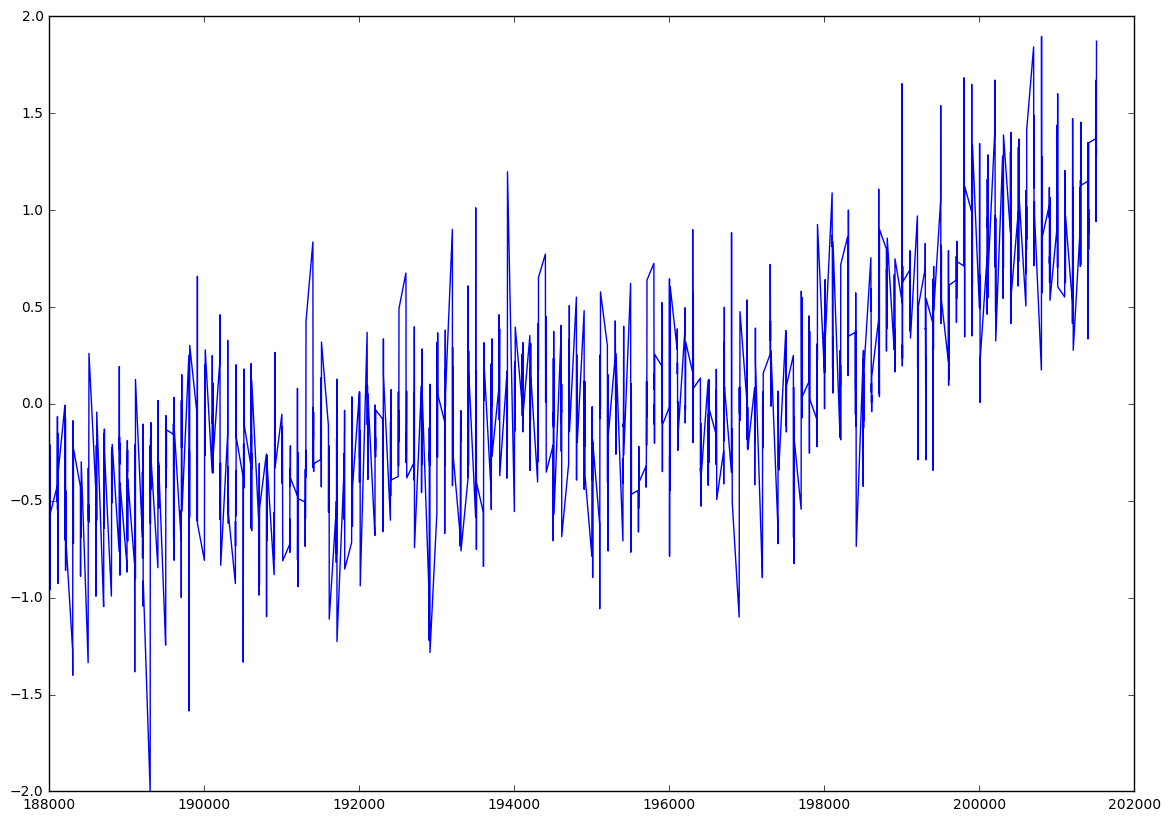

In [19]:
pyplot.figure(figsize = (14,10))
pyplot.plot(Temp_data[:,0],Temp_data[:,1]);

# Using `numpy.arange()` for creating date-array

In [32]:
date = np.arange('1880', '2016', dtype=('datetime64[M]'))
print(date)

['1880-01' '1880-02' '1880-03' ..., '2015-10' '2015-11' '2015-12']


In [41]:
divs = np.linspace(0, len(date), len(date))

In [42]:
pyplot.figure(figsize = (14,10))
# pyplot.plot(divs,Temp_data[:,1]);
len(divs)

1632

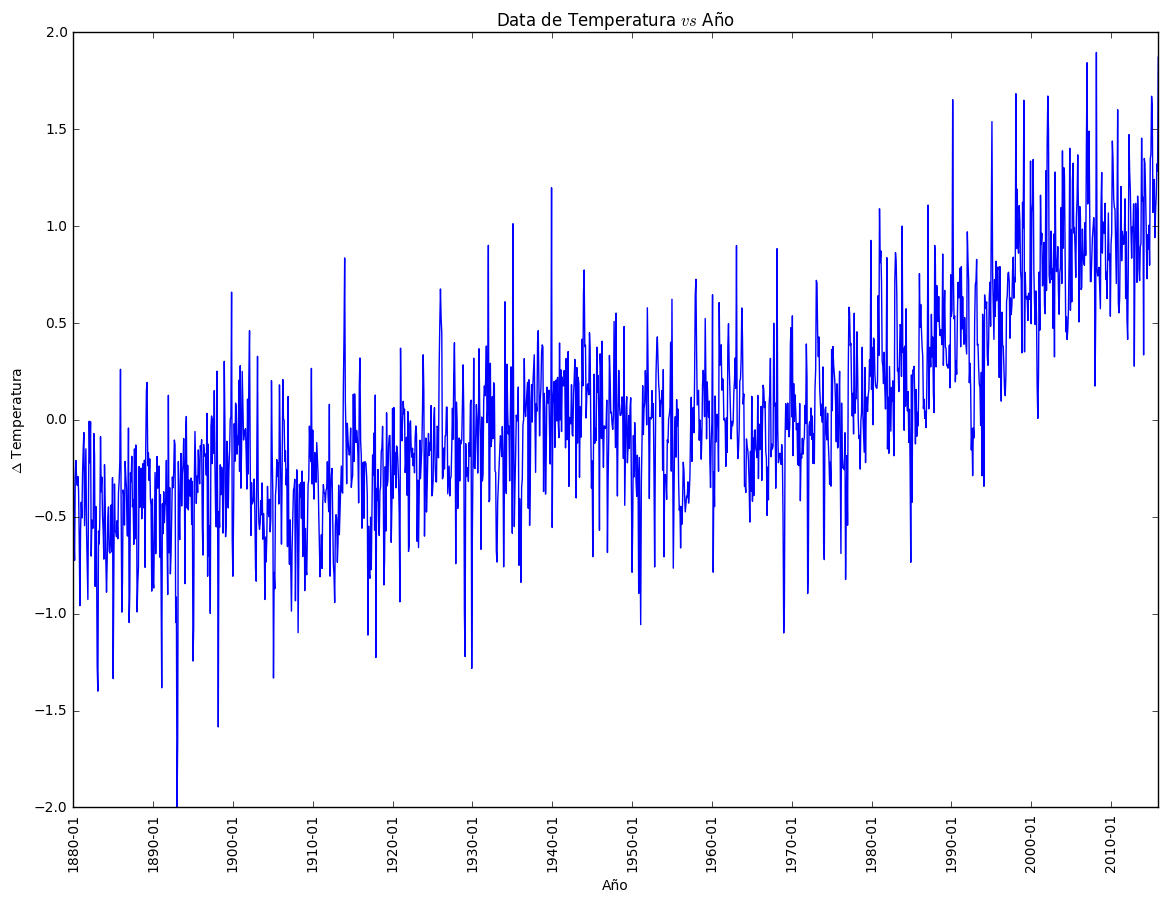

In [50]:
pyplot.figure(figsize = (14,10));
pyplot.xticks(divs[::120], date[::120], rotation = 90);
pyplot.plot(divs,Temp_data[:,1]);
pyplot.title('Data de Temperatura $vs$ Año');
pyplot.xlabel('Año');
pyplot.ylabel('$\Delta$ Temperatura');

In [52]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

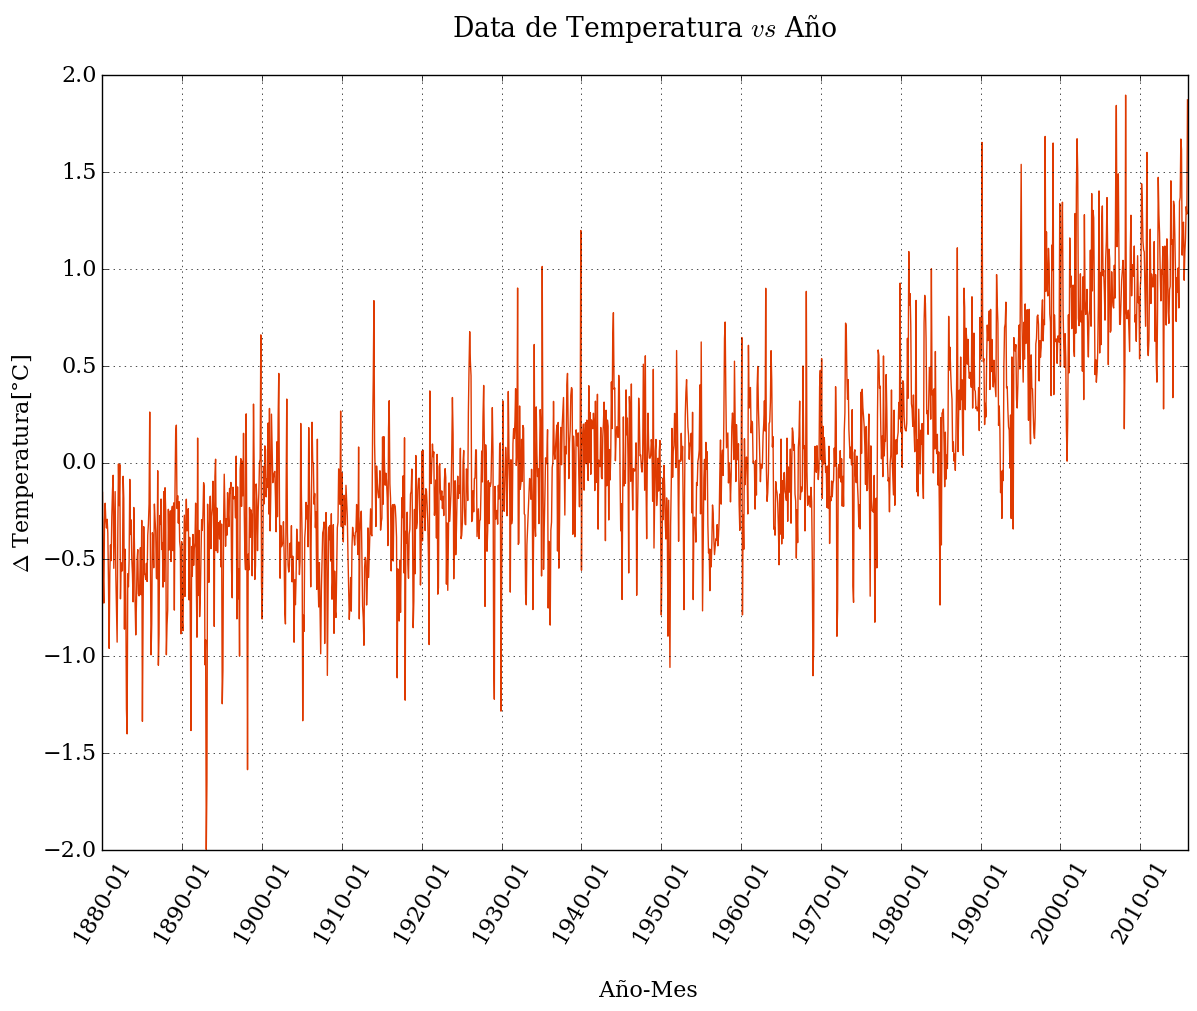

In [74]:
pyplot.figure(figsize = (14,10))
pyplot.xticks(divs[::120], date[::120], rotation = 60)
pyplot.plot(divs, Temp_data[:,1], color='#DF3A01', ls='-', lw = 1)
pyplot.title('Data de Temperatura $vs$ Año \n')
pyplot.xlabel('\n Año-Mes')
pyplot.ylabel('$\Delta$ Temperatura[°C]')
pyplot.grid();